In [69]:
import pandas as pd
import os
import streamlit as st

In [9]:
competicoes_df = pd.read_csv(r'../metadados/competições.csv', sep=',')
jogadores_df = pd.read_csv(r'../metadados/jogadores.csv', sep=',')

In [21]:
def download_image_to_folder(image_url, folder_path, filename):
    """
    Downloads an image from a URL to a specified folder.
    
    Args:
        image_url (str): The URL of the image.
        folder_path (str): The path to the destination folder.
        filename (str): The name to save the file as (e.g., 'my_image.jpg').
    """
    
    # 1. Ensure the destination folder exists; create it if necessary
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Created folder: {folder_path}")

    # 2. Define the full path for the new file
    file_path = os.path.join(folder_path, filename)

    try:
        # 3. Send a GET request to the URL to retrieve the image content
        # Use stream=True to efficiently download large files
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
        }
        response = requests.get(image_url, stream=True, headers=headers)
        response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

        # 4. Write the image content to the file in binary mode ('wb')
        with open(file_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        
        print(f"Successfully downloaded '{filename}' to '{folder_path}'")

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

In [68]:
for index, row in competicoes_df.iterrows():
    download_image_to_folder(row['Logo'], '../media/campeonatos', row['Sigla'] + '.jpg')

Successfully downloaded 'CDB.jpg' to 'media/campeonatos'
An error occurred: 429 Client Error: Too many requests. Please contact noc@wikimedia.org for further information (0068e25) for url: https://upload.wikimedia.org/wikipedia/pt/4/42/Campeonato_Brasileiro_S%C3%A9rie_A_logo.png
An error occurred: 404 Client Error: Not Found for url: https://yt3.googleusercontent.com/nxUTVALWav1MIHcZiURfEsdB2WyI-51uOKbdWWBAZz_WjNehOlZw7iFVUDDLw4Y0nn4SiqPlrNU=s900-c-k-c0x00ffffff-no-rj
Successfully downloaded 'LIB.jpg' to 'media/campeonatos'
An error occurred: 404 Client Error: Not Found for url: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRV5vpH9e_xJ9EmtbEXyNBfGOkN6Wu1ac62XQ&s


In [223]:
def get_notas(jogo_filename):
    file_path = 'jogos/' + jogo
    with open(file_path, 'r', encoding='utf-8') as jogo_csv:
        lines = jogo_csv.readlines()
        date = lines[0].split(',')[1]
        competition = lines[1].split(',')[1]
        vs = lines[2].split(',')[1]
        location = lines[3].split(',')[1]
    
    notas_jogo_df = pd.read_csv(file_path, sep=',', skiprows=5)
    notas_jogo_df['Data'] = date
    notas_jogo_df['Competição'] = competition
    notas_jogo_df['VS'] = vs
    notas_jogo_df['Local'] = location
    notas_jogo_df['Arquivo'] = jogo_filename
    
    return notas_jogo_df

In [224]:
jogos = []
jogos_df = pd.DataFrame()
for jogo in os.listdir('../jogos')[2:]:
    jogos_df = pd.concat([jogos_df, get_notas(jogo)], ignore_index=True)
    # jogos.append(get_notas(jogo))

,Jogador,Nota por,Nota,Data,Competição,VS,Local
0,Rossi,B10,6.0,2024-03-27,CAR,Portuguesa,F
1,Wesley,B10,6.5,2024-03-27,CAR,Portuguesa,F
2,David Luiz,B10,6.5,2024-03-27,CAR,Portuguesa,F
3,Léo Pereira,B10,7.5,2024-03-27,CAR,Portuguesa,F
4,Ayrton Lucas,B10,6.5,2024-03-27,CAR,Portuguesa,F
...,...,...,...,...,...,...,...
1690,Cebolinha,Simões,5.0,2025-02-12,CAR,Botafogo,C
1691,Bruno Henrique,B10,5.5,2025-02-12,CAR,Botafogo,C
1692,Michael,Simões,6.0,2025-02-12,CAR,Botafogo,C
1693,Gerson,Simões,6.0,2025-02-12,CAR,Botafogo,C


In [70]:
st.write("Here's our first attempt at using data to create a table:")
st.write(jogadores_df)

2025-12-20 22:27:54.364 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 22:27:54.638 
  command:

    streamlit run C:\Users\hmvel\.conda\envs\projeto_bs\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-20 22:27:54.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 22:27:54.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 22:27:54.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 22:27:54.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-20 22:27:54.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [85]:
import pprint

In [87]:
competicao_dict = {}
for competicao in competicoes_df.itertuples():
    competicao_dict[competicao[1]] = competicao[3]

pprint.pprint(competicao_dict)

{'BR': 'https://upload.wikimedia.org/wikipedia/pt/4/42/Campeonato_Brasileiro_S%C3%A9rie_A_logo.png',
 'CAR': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRV5vpH9e_xJ9EmtbEXyNBfGOkN6Wu1ac62XQ&s',
 'CDB': 'https://static.wikia.nocookie.net/futebol/images/3/37/Copa_do_Brasil_logo.png/revision/latest/thumbnail/width/360/height/360?cb=20211214152944',
 'FCS': 'https://yt3.googleusercontent.com/nxUTVALWav1MIHcZiURfEsdB2WyI-51uOKbdWWBAZz_WjNehOlZw7iFVUDDLw4Y0nn4SiqPlrNU=s900-c-k-c0x00ffffff-no-rj',
 'LIB': 'https://upload.wikimedia.org/wikipedia/en/thumb/a/a1/Copa_Libertadores_logo.svg/1200px-Copa_Libertadores_logo.svg.png'}


In [92]:
def split_list(list_to_split, n_elements):
    final_list = []
    section_list = []
    for element in list_to_split:
        section_list.append(element)
        if len(section_list) == n_elements:
            final_list.append(section_list)
            section_list = []
    if len(section_list) > 0:
        final_list.append(section_list)
        
    return final_list

In [95]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9]
split_list(a, 5)

[[1, 2, 3, 4, 5], [6, 7, 8, 9]]

In [97]:
jogos_jogador = jogos_df[jogos_df['Jogador'] == 'Ayrton Lucas']
max_nota = jogos_jogador['Nota'].max()
min_nota = jogos_jogador['Nota'].min()

jogos_max_df = jogos_jogador[jogos_jogador['Nota'] == max_nota]
jogos_min_df = jogos_jogador[jogos_jogador['Nota'] == min_nota]

In [100]:
jogos_min_df

,Jogador,Nota por,Nota,Data,Competição,VS,Local
1090,Ayrton Lucas,Simões,2.0,2024-09-01,BR,Corinthians,F
1345,Ayrton Lucas,B10,2.0,2024-10-30,BR,Internacional,F
1346,Ayrton Lucas,Simões,2.0,2024-10-30,BR,Internacional,F
1385,Ayrton Lucas,B10,2.0,2024-11-06,BR,Cruzeiro,F
1397,Ayrton Lucas,Simões,2.0,2024-11-06,BR,Cruzeiro,F


In [154]:
jogos_min = []
for data_jogo in jogos_min_df.Data.unique():
    jogo_atual_df = jogos_min_df[jogos_min_df['Data'] == data_jogo]
    notas_por = jogo_atual_df['Nota por'].str.cat(sep=' e ')
    time_vs = jogo_atual_df.VS.to_list()[0]
    ano = jogo_atual_df.Data.to_list()[0][:4]
    competicao = get_competicao(jogo_atual_df.Competição.to_list()[0], competicoes_df)
    # print(jogo_atual_df.Local.to_list()[0])
    if jogo_atual_df.Local.to_list()[0] == 'F':
        jogo = time_vs + ' x Flamengo'
    else:
        jogo = 'Flamengo x ' + time_vs
    
    jogos_min.append(jogo + ' - ' + competicao + ' ' + ano + ' (' + notas_por + ')')
    print(ano)

jogos_min_str = '\n'.join(jogos_min)

2024
2024
2024


In [115]:
jogo_atual_df.Local.to_list()[0]

'F'

In [139]:
def get_competicao(sigla, competicao_df):
    return competicao_df[competicao_df['Sigla'] == sigla]['Competição'].values[0]

In [140]:
get_competicao('BR', competicoes_df)

'Brasileirão'

In [160]:
jogos_jogador = jogos_jogador[jogos_jogador['Data'].str.contains('2025')]
jogos_jogador

,Jogador,Nota por,Nota,Data,Competição,VS,Local
1599,Ayrton Lucas,B10,5.0,2025-01-19,FCS,São Paulo,F
1600,Ayrton Lucas,Simões,5.0,2025-01-19,FCS,São Paulo,F
1624,Ayrton Lucas,B10,6.5,2025-01-25,CAR,Volta Redonda,F
1643,Ayrton Lucas,B10,6.0,2025-01-30,CAR,Sampaio Correia,C
1657,Ayrton Lucas,Simões,6.0,2025-01-30,CAR,Sampaio Correia,C


In [156]:
import matplotlib.pyplot as plt

In [203]:
def notas_por_pessoa(df, nome, datas):
    return (
        df[df["Nota por"] == nome]
        .set_index("Data")
        .reindex(datas)["Nota"]
        .tolist()
    )
def get_escudos(df_jogador, datas, times_dict):
    escudos = []
    for data_jogo in datas:
        time = df_jogador[df_jogador['Data'] == data_jogo]['VS'].to_list()[0]
        escudos.append(times_dict[time])

    return escudos
        

In [202]:
times_dict = {}
flag = True
with open('../metadados/times.csv', 'r', encoding='utf-8') as f:
    for time in f:
        if flag:
            flag = False
        else:
            dados = time.strip().split(',')
            times_dict[dados[0]] = dados[1]

times_dict

{'Volta Redonda': 'media/escudos/volta.png',
 'Sampaio Correia': 'media/escudos/sampaio_correa_rj.png',
 'São Paulo': 'media/escudos/saopaulo.png'}

In [209]:
try:
    times_dict['PSG']
except:
    print('Não encontrado')

Não encontrado


In [169]:
datas = jogos_jogador['Data'].unique()

In [174]:
notas_b10 = notas_por_pessoa(jogos_jogador, 'B10')
notas_simoes = notas_por_pessoa(jogos_jogador, 'Simões')

In [172]:
notas_b10
notas_simoes

[5.0, nan, 6.0]

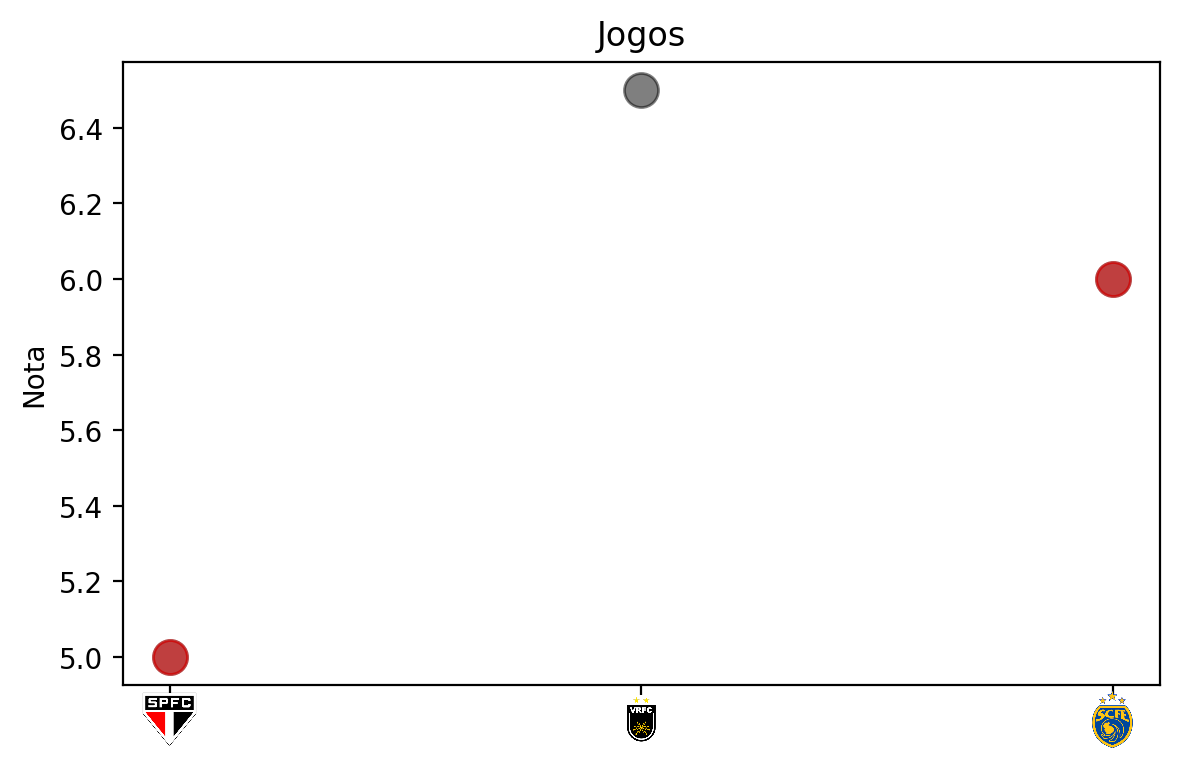

In [206]:
x = jogos_jogador['Data'].unique()
y_simoes = notas_por_pessoa(jogos_jogador, 'Simões', x)
y_b10 = notas_por_pessoa(jogos_jogador, 'B10', x)

escudos = get_escudos(jogos_jogador, x, times_dict)

fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
ax.scatter(x, y_b10, c='black', s=150, alpha=0.5)
ax.scatter(x, y_simoes, c='red', s=150, alpha=0.5)

# remove texto dos ticks
ax.set_xticks(x)
ax.set_xticklabels([""] * len(x))

def add_image(ax, img_path, xy, zoom=0.08):
    if not os.path.exists(img_path):
        return  # evita crash se faltar imagem
    img = mpimg.imread(img_path)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(
        imagebox,
        xy,
        frameon=False,
        box_alignment=(0.5, 1.1)
    )
    ax.add_artist(ab)

# adiciona imagens no eixo X
y_min = ax.get_ylim()[0]
for xi, img_path in zip(x, image_paths):
    add_image(ax, img_path, (xi, y_min))

ax.set_ylabel("Nota")
ax.set_title("Jogos")

plt.tight_layout()
plt.show()

In [197]:
times_df = pd.read_csv(r'../metadados/times.csv', sep=',')
times_df

,Time,Escudo
0,Volta Redonda,media/escudos/volta.png
1,Sampaio Correia,media/escudos/sampaio_correa_rj.png
2,São Paulo,media/escudos/saopaulo.png


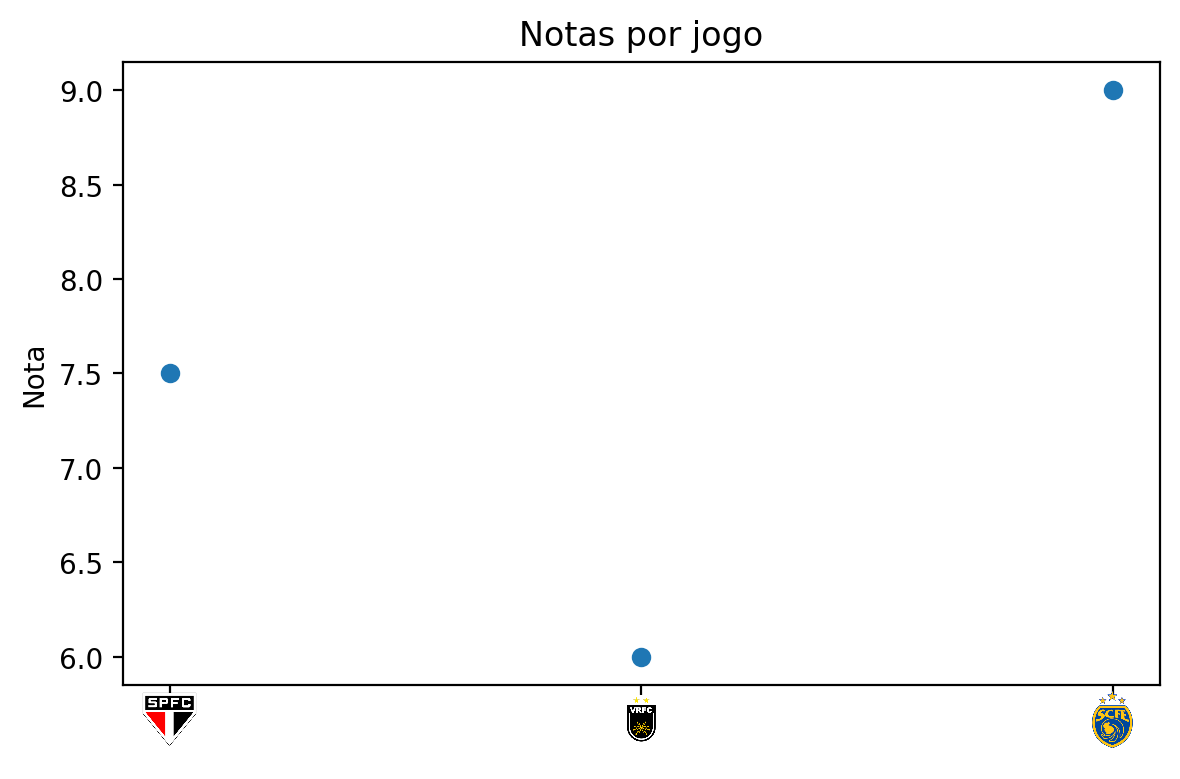

In [194]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import os



image_paths = [
    "media/escudos/saopaulo.png",
    "media/escudos/volta.png",
    "media/escudos/sampaio_correa_rj.png",
]

fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
ax.scatter(x, y)

# remove texto dos ticks
ax.set_xticks(x)
ax.set_xticklabels([""] * len(x))

def add_image(ax, img_path, xy, zoom=0.08):
    if not os.path.exists(img_path):
        return  # evita crash se faltar imagem
    img = mpimg.imread(img_path)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(
        imagebox,
        xy,
        frameon=False,
        box_alignment=(0.5, 1.1)
    )
    ax.add_artist(ab)

# adiciona imagens no eixo X
y_min = ax.get_ylim()[0]
for xi, img_path in zip(x, image_paths):
    add_image(ax, img_path, (xi, y_min))

ax.set_ylabel("Nota")
ax.set_title("Notas por jogo")

plt.tight_layout()
plt.show()


In [236]:
from PIL import Image
import os

INPUT_DIR = "../media/escudos_raw"
OUTPUT_DIR = "../media/escudos"
MAX_SIZE = (256, 256)  # largura, altura

os.makedirs(OUTPUT_DIR, exist_ok=True)

def resize_with_padding(img, size=(256, 256)):
    img.thumbnail(size, Image.LANCZOS)
    background = Image.new("RGBA", size, (0, 0, 0, 0))
    offset = (
        (size[0] - img.size[0]) // 2,
        (size[1] - img.size[1]) // 2
    )
    background.paste(img, offset)
    return background

for filename in os.listdir(INPUT_DIR):
    if not filename.lower().endswith((".png", ".jpg", ".jpeg")):
        continue

    path_in = os.path.join(INPUT_DIR, filename)
    path_out = os.path.join(OUTPUT_DIR, filename)

    img = Image.open(path_in).convert("RGBA")

    # redimensiona mantendo proporção
    img = resize_with_padding(img, MAX_SIZE)
    img.save(path_out, format="PNG")

print("Escudos redimensionados com sucesso!")

Escudos redimensionados com sucesso!


In [232]:
from PIL import Image, ImageDraw

def make_circle_with_border(
    input_path,
    output_path,
    size=(256, 256),
    border_width=8,
    border_color=(0, 0, 0, 255)  # branco
):
    img = Image.open(input_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    # máscara circular
    mask = Image.new("L", size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0, size[0], size[1]), fill=255)

    img.putalpha(mask)

    # canvas maior para a borda
    bordered_size = (
        size[0] + 2 * border_width,
        size[1] + 2 * border_width
    )
    canvas = Image.new("RGBA", bordered_size, (0, 0, 0, 0))

    # desenha a borda
    draw = ImageDraw.Draw(canvas)
    draw.ellipse(
        (0, 0, bordered_size[0], bordered_size[1]),
        fill=border_color
    )

    # cola a imagem no centro
    canvas.paste(img, (border_width, border_width), img)

    canvas.save(output_path, format="PNG")

In [235]:
make_circle_with_border(
    "../media/canal/b10.jpg",
    "media/canal/b10.png",
    border_width=10
)

make_circle_with_border(
    "../media/canal/simoes.jpg",
    "media/canal/simoes.png",
    border_width=10
)